<a href="https://colab.research.google.com/github/Justinr2940/Summer-Micro-Credential/blob/main/Diabetic_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will perform a logistic regression and knn analysis of the data set to see whether a patient will be readmitted to a hospital based on the number of prcedures and diagnosises they had done at the hospital

#Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Load Data

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/Justinr2940/Machine-learning-Data/main/diabetic_data.csv')

#EDA

In [13]:
df.head(20)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [10]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [11]:
df.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

In [24]:
df['readmitted'].unique()#Checking for ? values in specific column

array(['NO', '>30', '<30'], dtype=object)

In [56]:
df['payer_code'].value_counts()#Checking for ? values in specific column

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [108]:
df['num_lab_procedures'].value_counts()#Checking for ? values in specific column

1      3208
43     2804
44     2496
45     2376
38     2213
       ... 
120       1
132       1
121       1
126       1
118       1
Name: num_lab_procedures, Length: 118, dtype: int64

#Data Visualization

In [106]:
df.columns.values.tolist()#Looking at the names of all the columns

['encounter_id',
 'patient_nbr',
 'age',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'Male',
 'AfricanAmerican',
 'Asian',
 'Caucasian',
 'Hispanic',
 'Other']

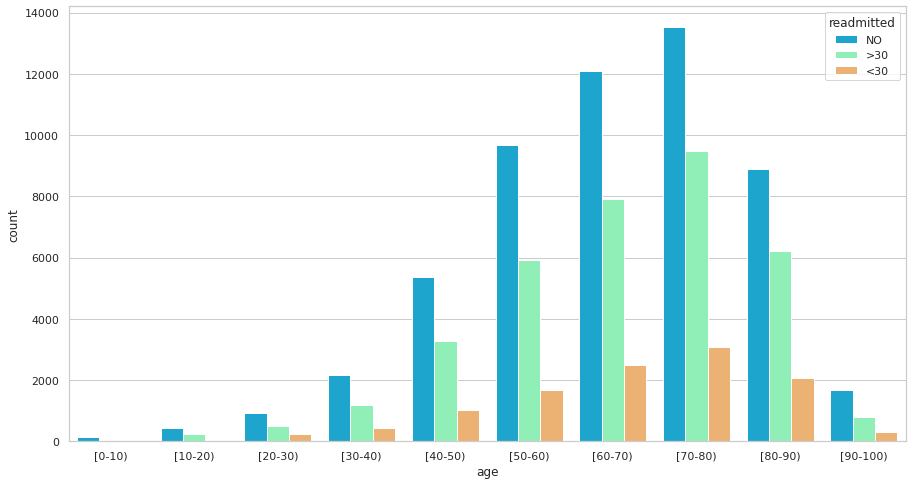

In [28]:
sns.set_style('whitegrid')
sns.countplot(x = "age", hue='readmitted', data = df, palette = "rainbow")
sns.set(rc = {'figure.figsize':(15,12)})
#Compared the amount of people in each age group to wheather they were readmitted within the the last thirty days or not readmitted at all

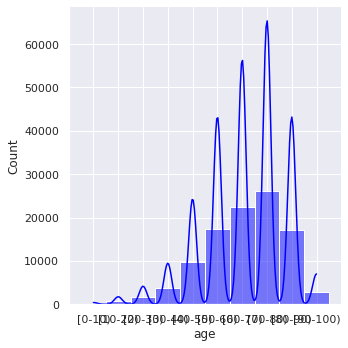

In [44]:
sns.displot(df['age'].dropna(), kde= True, color = 'blue')
#Used a dist olot to see the amount of people within each age group

In [45]:
df['age'].unique()#Looking at the values in the age column

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [48]:
df['weight'].unique()#Values in the weight column

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

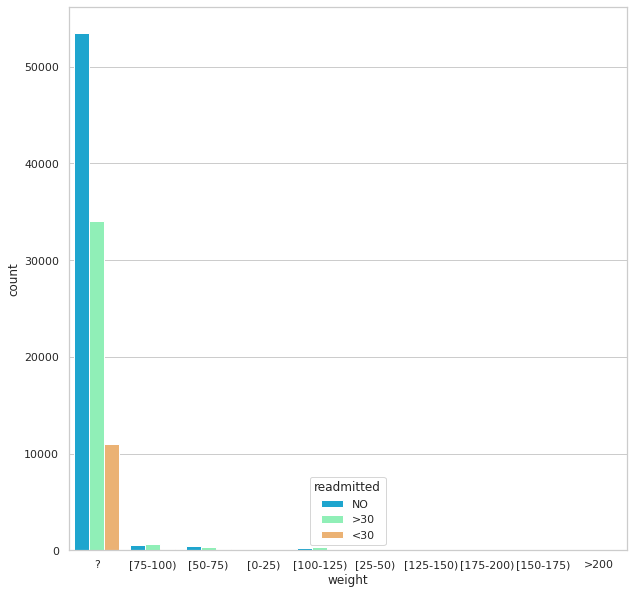

In [49]:
sns.set_style('whitegrid')
sns.countplot(x = "weight", hue='readmitted', data = df, palette = "rainbow")
sns.set(rc = {'figure.figsize':(15,12)})

In [50]:
df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [94]:
df.drop(['weight'], axis = 1, inplace = True)#Dropping weight column because there were barely any values compared to the large amount of data given

In [74]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [92]:
gender = pd.get_dummies(df['gender'], drop_first = True)
df = pd.concat([df, gender], axis = 1)
df.drop(['gender','Unknown/Invalid'], axis = 1, inplace = True)
#Creating dummy variable for gender to change it to a int variiable
df.head()

,encounter_id,patient_nbr,race,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,Male
0,2278392,8222157,Caucasian,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,[10-20),?,1,1,7,3,?,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,[30-40),?,1,1,7,2,?,...,Up,No,No,No,No,No,Ch,Yes,NO,1
4,16680,42519267,Caucasian,[40-50),?,1,1,7,1,?,...,Steady,No,No,No,No,No,Ch,Yes,NO,1


In [93]:
race =pd.get_dummies(df['race'], drop_first = True)
df = pd.concat([df, race], axis = 1)
df.drop(['race'], axis = 1, inplace = True)
df.head()
#Creatting dummy variables for race

,encounter_id,patient_nbr,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,metformin-pioglitazone,change,diabetesMed,readmitted,Male,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,2278392,8222157,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,NO,0,0,0,1,0,0
1,149190,55629189,[10-20),?,1,1,7,3,?,?,...,No,Ch,Yes,>30,0,0,0,1,0,0
2,64410,86047875,[20-30),?,1,1,7,2,?,?,...,No,No,Yes,NO,0,1,0,0,0,0
3,500364,82442376,[30-40),?,1,1,7,2,?,?,...,No,Ch,Yes,NO,1,0,0,1,0,0
4,16680,42519267,[40-50),?,1,1,7,1,?,?,...,No,Ch,Yes,NO,1,0,0,1,0,0


In [95]:
df.head()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,metformin-pioglitazone,change,diabetesMed,readmitted,Male,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,2278392,8222157,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,...,No,No,No,NO,0,0,0,1,0,0
1,149190,55629189,[10-20),1,1,7,3,?,?,59,...,No,Ch,Yes,>30,0,0,0,1,0,0
2,64410,86047875,[20-30),1,1,7,2,?,?,11,...,No,No,Yes,NO,0,1,0,0,0,0
3,500364,82442376,[30-40),1,1,7,2,?,?,44,...,No,Ch,Yes,NO,1,0,0,1,0,0
4,16680,42519267,[40-50),1,1,7,1,?,?,51,...,No,Ch,Yes,NO,1,0,0,1,0,0


In [130]:
age_listing = {'[0-10)':5, '[10-20)':15,'[20-30)':25,'[30-40)':35,'[40-50)':45,'[50-60)':55,'[60-70)':65,'[70-80)':75,'[80-90)':85,'[90-100)':95}
df['fixed_age_group'] = df.age.replace(age_listing)
#Creating a int column for age by placing people within the middle of their specifed age group

In [131]:
df[['fixed_age_group']].head()

,fixed_age_group
0,5
1,15
2,25
3,35
4,45


In [140]:
df.drop('age', axis= 1, inplace = True)

In [141]:
df.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,...,change,diabetesMed,readmitted,Male,AfricanAmerican,Asian,Caucasian,Hispanic,Other,fixed_age_group
0,2278392,8222157,6,25,1,1,?,Pediatrics-Endocrinology,41,0,...,No,No,NO,0,0,0,1,0,0,5
1,149190,55629189,1,1,7,3,?,?,59,0,...,Ch,Yes,>30,0,0,0,1,0,0,15
2,64410,86047875,1,1,7,2,?,?,11,5,...,No,Yes,NO,0,1,0,0,0,0,25
3,500364,82442376,1,1,7,2,?,?,44,1,...,Ch,Yes,NO,1,0,0,1,0,0,35
4,16680,42519267,1,1,7,1,?,?,51,0,...,Ch,Yes,NO,1,0,0,1,0,0,45


#Data Splitting

In [57]:
from sklearn.model_selection import train_test_split

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   payer_code                101766 non-null  object
 8   medical_specialty         101766 non-null  object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [435]:
X = df[['fixed_age_group','time_in_hospital', 'num_procedures', 'num_lab_procedures','num_medications', 'Male', 'Caucasian', 'Hispanic', 'Asian', 'AfricanAmerican','number_emergency', 'number_inpatient', 'number_outpatient', 'Other'  ]]
y = df['readmitted']
#Creating the Variables

In [455]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1, random_state=0)#Splitting the data with a test size of 1000

In [456]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
#Transforming the data

StandardScaler()

In [457]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic regression

In [458]:
from sklearn.linear_model import LogisticRegression

In [459]:
classifier =LogisticRegression(random_state= 0)#Create logistic regression model


In [460]:
classifier.fit(X_train, y_train)#Fit data to model

LogisticRegression(random_state=0)

###Making predictions

In [461]:
y_pred = classifier.predict(X_test)

In [462]:
prediction = classifier.predict(X_test)

In [463]:
print("the preditction accuracy of the model is ", classifier.score(X_test, y_test))
pp = classifier.predict(X_test)
no = 0
greater_than_thirty = 0
less_than_thirty = 0
for i in pp:
  if (i == '<30'):
    less_than_thirty += 1
  elif i == '>30' : 
    greater_than_thirty += 1
  else:
    no += 1

print('The number of people readmitted in under thirty days are: ', less_than_thirty)
print('The number of people readmitted after thirty days: ', greater_than_thirty)
print('The number of people who werent readmitted: ', no)
#Making predictions based on logistic regression model

the preditction accuracy of the model is  0.56784907143559
The number of people readmitted in under thirty days are:  27
The number of people readmitted after thirty days:  1577
The number of people who werent readmitted:  8573


#KNN Model

In [464]:
scaled_x_train = sc.transform(X_train)
scaled_x_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [465]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_x_train, y_train)#Build knn model

KNeighborsClassifier()

In [466]:
pred = knn.predict(scaled_x_test)

In [467]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [468]:
classifier.fit(scaled_x_train, y_train) # fitting the model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [469]:
y_pred = classifier.predict(scaled_x_test)
y_pred#Making predictions

array(['NO', 'NO', 'NO', ..., 'NO', 'NO', '>30'], dtype=object)

In [470]:
accuracy_score(y_test, y_pred)#Accuracy of the knn model

0.5684386361403164

###Error rate

In [471]:
error_rate = [] #Predicting the error rate for the model

for i in range (1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

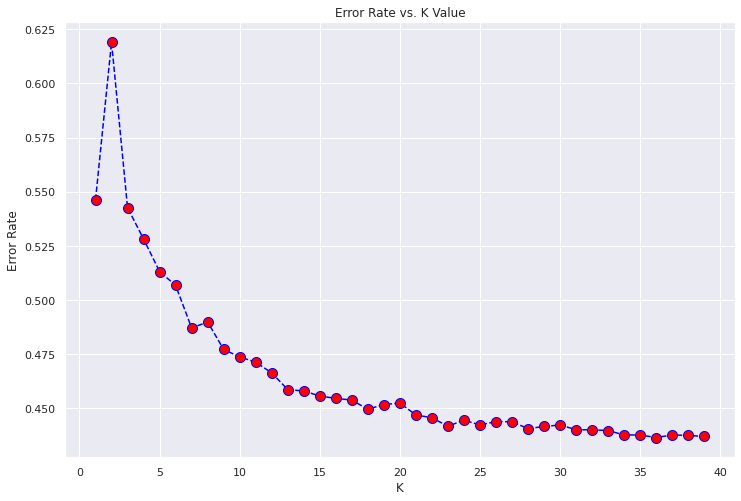

In [472]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle='dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')
#Graphing the error rate for the model